<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Energy-over-time" data-toc-modified-id="Energy-over-time-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Energy over time</a></span></li><li><span><a href="#One-week----Energy" data-toc-modified-id="One-week----Energy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>One week -- Energy</a></span></li><li><span><a href="#Temperature-(and-energy)" data-toc-modified-id="Temperature-(and-energy)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Temperature (and energy)</a></span></li><li><span><a href="#One-week----Temperature" data-toc-modified-id="One-week----Temperature-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>One week -- Temperature</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


train = pd.read_csv("../input/train.csv")
train["date"] = pd.to_datetime(train["date"])
train

date        mw  temp  hour  day  weekday  month  \
0     2017-02-01 00:53:00+00:00  1419.881  37.0     0    1        2      2   
1     2017-02-01 01:53:00+00:00  1379.505  37.0     1    1        2      2   
2     2017-02-01 02:53:00+00:00  1366.106  36.0     2    1        2      2   
3     2017-02-01 03:53:00+00:00  1364.453  36.0     3    1        2      2   
4     2017-02-01 04:53:00+00:00  1391.265  36.0     4    1        2      2   
...                         ...       ...   ...   ...  ...      ...    ...   
25531 2019-12-31 19:53:00+00:00  1522.008  32.0    19   31        1     12   
25532 2019-12-31 20:53:00+00:00  1487.581  32.0    20   31        1     12   
25533 2019-12-31 21:53:00+00:00  1463.407  32.0    21   31        1     12   
25534 2019-12-31 22:53:00+00:00  1395.177  30.0    22   31        1     12   
25535 2019-12-31 23:53:00+00:00  1321.977  30.0    23   31        1     12   

       year  
0      2017  
1      2017  
2      2017  
3      2017  
4      2017  
...     ...  
25531  2019  
25532  2019  
25533  2019  
25534  2019  
25535  2019  

[25536 rows x 8 columns]

# Plots

## Energy over time

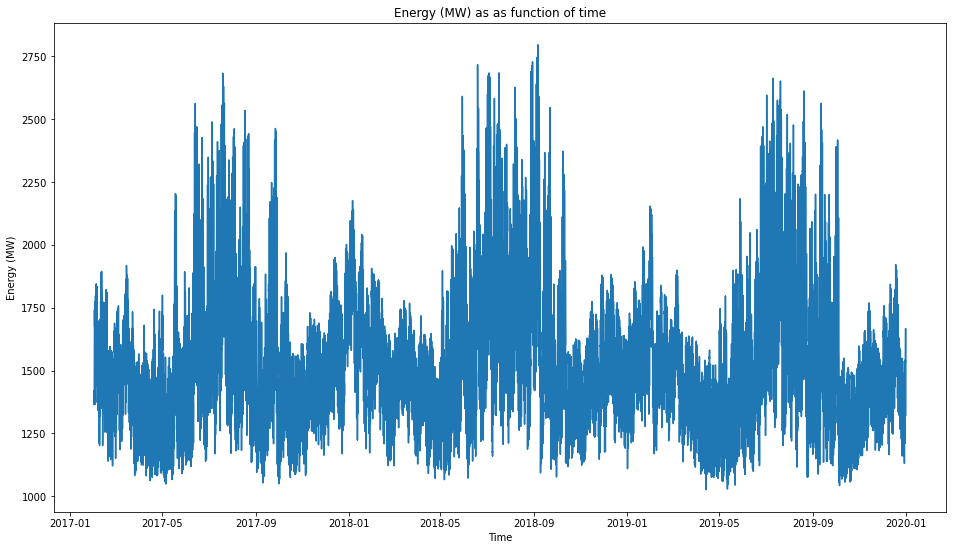

In [2]:
plt.figure(figsize=(16, 9))
plt.xlabel("Time")
plt.ylabel("Energy (MW)")
plt.title("Energy (MW) as as function of time")
plt.plot(train["date"], train["mw"])
plt.show()

## One week -- Energy

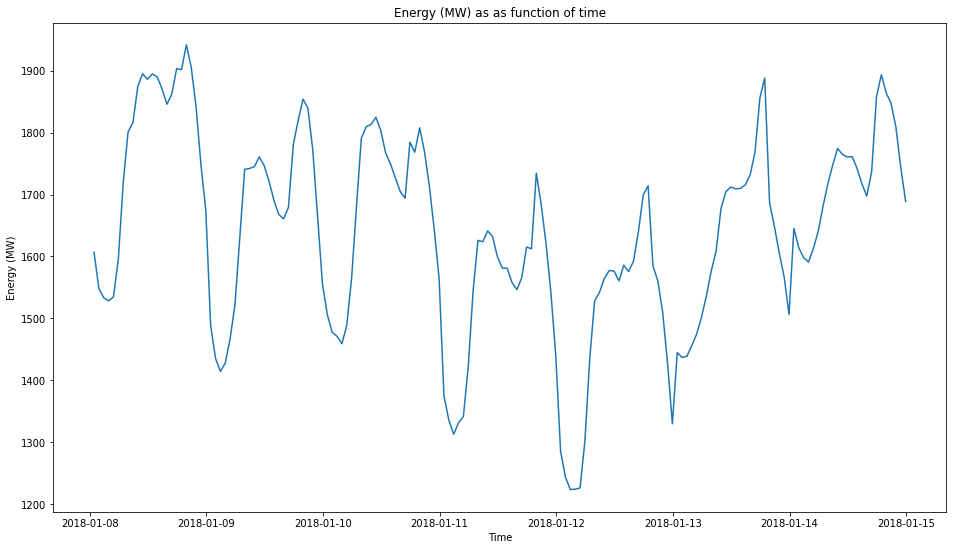

In [3]:
train["week"] = train["date"].dt.isocalendar().week
single_week = train.loc[
    (train["week"] == 2) & (train["year"] == 2018),
]

plt.figure(figsize=(16, 9))
plt.xlabel("Time")
plt.ylabel("Energy (MW)")
plt.title("Energy (MW) as as function of time")
plt.plot(single_week["date"], single_week["mw"])
plt.show()

## Temperature (and energy)

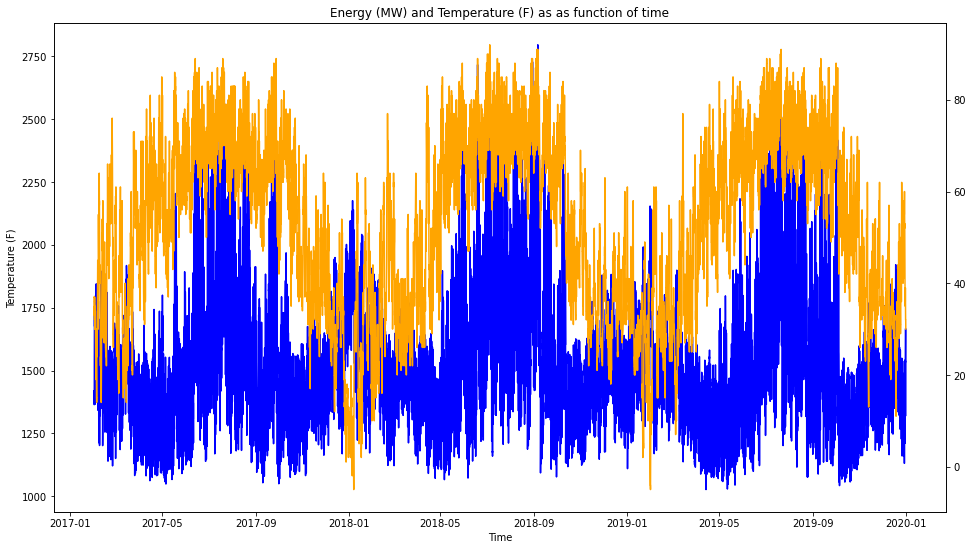

In [4]:
fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot()
ax1.set_xlabel("Time")
ax1.set_ylabel("Energy (MW)")
ax1.set_title("Energy (MW) and Temperature (F) as as function of time")
ax1.plot(train["date"], train["mw"], color="blue")

ax2 = ax1.twinx()

ax1.set_ylabel("Temperature (F)")
ax2.plot(train["date"], train["temp"], color="orange")
plt.show()

## One week -- Temperature

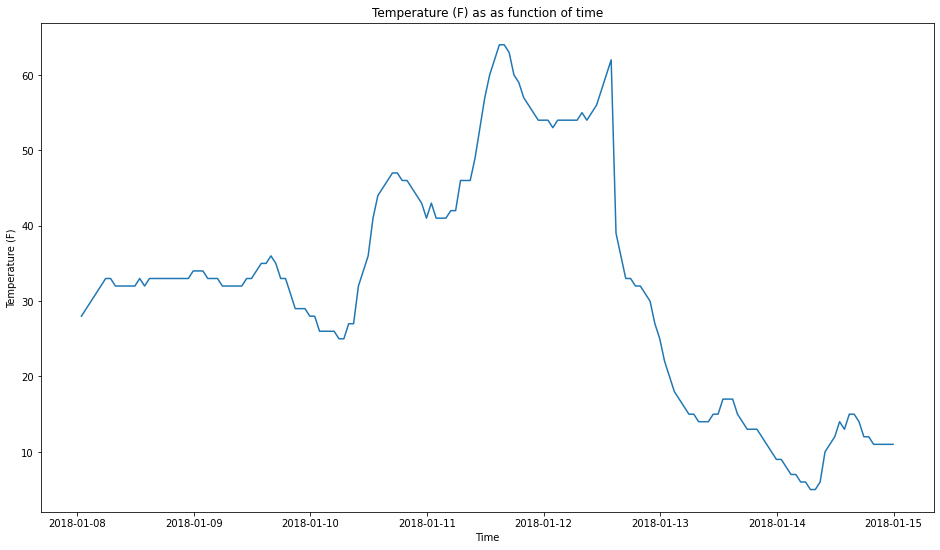

In [5]:
train["week"] = train["date"].dt.isocalendar().week
single_week = train.loc[
    (train["week"] == 2) & (train["year"] == 2018),
]

plt.figure(figsize=(16, 9))
plt.xlabel("Time")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) as as function of time")
plt.plot(single_week["date"], single_week["temp"])
plt.show()

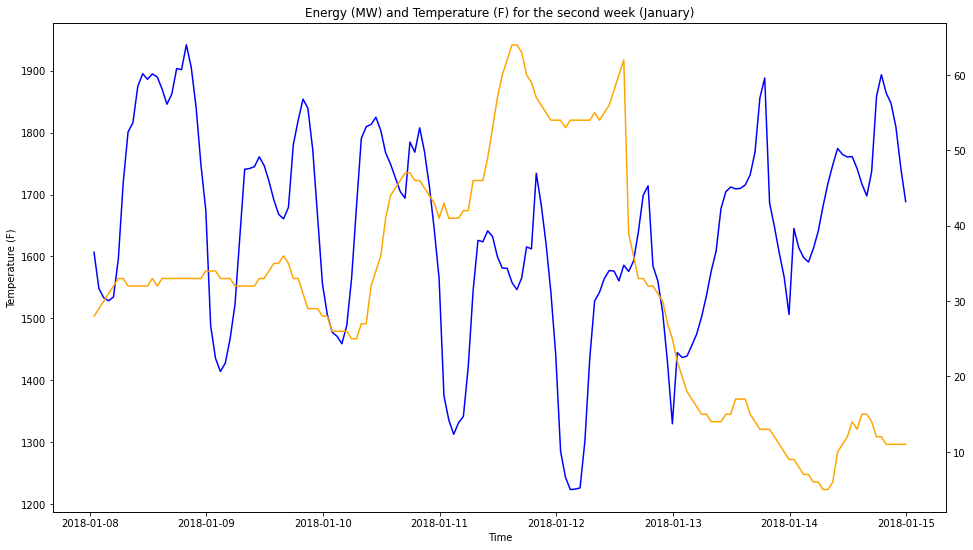

In [6]:
fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot()
ax1.set_xlabel("Time")
ax1.set_ylabel("Energy (MW)")
ax1.set_title("Energy (MW) and Temperature (F) for the second week (January)")
ax1.plot(single_week["date"], single_week["mw"], color="blue")

ax2 = ax1.twinx()

ax1.set_ylabel("Temperature (F)")
ax2.plot(single_week["date"], single_week["temp"], color="orange")
plt.show()

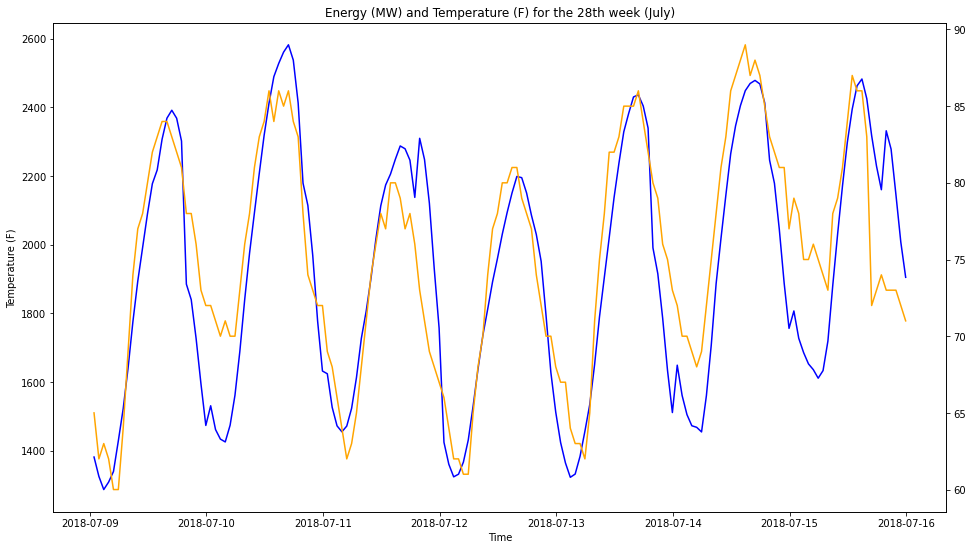

In [7]:
train["week"] = train["date"].dt.isocalendar().week
single_week = train.loc[
    (train["week"] == 28) & (train["year"] == 2018),
]

fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot()
ax1.set_xlabel("Time")
ax1.set_ylabel("Energy (MW)")
ax1.set_title("Energy (MW) and Temperature (F) for the 28th week (July)")
ax1.plot(single_week["date"], single_week["mw"], color="blue")

ax2 = ax1.twinx()

ax1.set_ylabel("Temperature (F)")
ax2.plot(single_week["date"], single_week["temp"], color="orange")
plt.show()

In [8]:
train[["mw", "temp"]].corr()

mw      temp
mw    1.000000  0.326166
temp  0.326166  1.000000

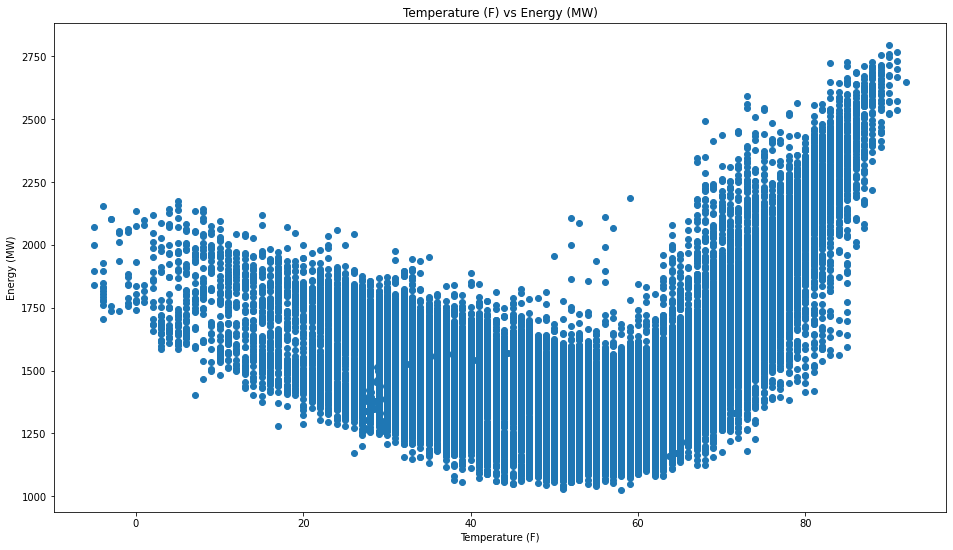

In [9]:
plt.figure(figsize=(16, 9))
plt.xlabel("Temperature (F)")
plt.ylabel("Energy (MW)")
plt.title("Temperature (F) vs Energy (MW)")
plt.scatter(train["temp"], train["mw"])
plt.show()